This code is used to reformat the data quoted from various papers, 
then compare the pulsar positions from timing and VLBI astrometry.

In [1]:
from functools import reduce

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator

from astropy.table import Table, join
from astropy import units as u

import seaborn as sns

from psrcrf_tools import *

/Users/Neo/Scisoft/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 1. Data preparation

Read the timing solution data.

In [2]:
timing_table = Table.read("../data/timing_vlbi.fits",)
timing_table.sort("psr_name")

Add unit information

In [3]:
timing_table["plx"].unit = u.mas
timing_table["plx_err"].unit = u.mas

Load the cross-match table.

In [4]:
vlbi_table = Table.read("../data/psrpi.dat", format="ascii")

Add unit information

In [5]:
vlbi_table["plx"].unit = u.mas
vlbi_table["plx_err"].unit = u.mas

Supplement the timing table with the Gaia astrometrical information.

In [6]:
vlbi_timing = join(timing_table,
                   vlbi_table,
                   keys="psr_name",
                   join_type="left",
                   table_names=["t", "v"])

In [7]:
vlbi_timing_pm = vlbi_timing[(vlbi_timing["plx_err_t"] != 0)]
count_psr_nb(vlbi_timing_pm)

There are 6 pulsars with 26 measurements.


## DE200 vs VLBI

In [8]:
mask = vlbi_timing_pm["eph"] == "DE200"
pm_tab200 = vlbi_timing_pm[mask]

pm_tab200

psr_bname,psr_name,pos_epoch_t,eph,ra_t,dec_t,pmra_t,pmdec_t,plx_t,ra_err_t,dec_err_t,pmra_err_t,pmdec_err_t,plx_err_t,ref,comment,pos_epoch_v,ra_v,dec_v,pmra_v,pmdec_v,plx_v,ra_err_v,dec_err_v,pmra_err_v,pmdec_err_v,plx_err_v
,,d,,,,,,mas,,,,,mas,,,,,,,,mas,,,,,mas
bytes10,str11,float64,bytes5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes6,bytes13,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


## DE405 vs VLBI

In [9]:
mask = vlbi_timing_pm["eph"] == "DE405"
pm_tab405 = vlbi_timing_pm[mask]

pm_tab405

psr_bname,psr_name,pos_epoch_t,eph,ra_t,dec_t,pmra_t,pmdec_t,plx_t,ra_err_t,dec_err_t,pmra_err_t,pmdec_err_t,plx_err_t,ref,comment,pos_epoch_v,ra_v,dec_v,pmra_v,pmdec_v,plx_v,ra_err_v,dec_err_v,pmra_err_v,pmdec_err_v,plx_err_v
,,d,,,,,,mas,,,,,mas,,,,,,,,mas,,,,,mas
bytes10,str11,float64,bytes5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes6,bytes13,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
J1012+5307,J1012+5307,50700.0,DE405,153.13930875416665,53.117389083333336,2.562,-25.61,1.22,0.08912635815241264,0.13,0.014,0.02,0.26,lwj+09,,57700.0,153.13933291666663,53.11725361111111,2.67,-25.4,1.21,0.9,1.0,0.09,0.14,0.08
J1022+1001,J1022+1001,53589.0,DE405,155.74167916666667,10.031322222222222,-17.02,0.0,1.8,44.312070446316405,130.0,0.14,0.0,0.6000000000000001,vbc+09,,56000.0,155.74164875,10.0313236111,-14.89,5.59,1.39,1.477,2.0,0.05,0.03,0.04
J2145-0750,J2145-0750,53040.0,DE405,326.4602671666666,-7.838455527777778,-9.66,-8.9,1.6,0.4457954377559239,1.4000000000000001,0.15,0.4,0.5,vbc+09,,56000.0,326.460245,-7.8384761111,-9.51,-9.1,1.6,1.486,4.0,0.04,0.09,0.03


## DE421 vs VLBI

In [10]:
mask = vlbi_timing_pm["eph"] == "DE421"
pm_tab421 = vlbi_timing_pm[mask]

pm_tab421

psr_bname,psr_name,pos_epoch_t,eph,ra_t,dec_t,pmra_t,pmdec_t,plx_t,ra_err_t,dec_err_t,pmra_err_t,pmdec_err_t,plx_err_t,ref,comment,pos_epoch_v,ra_v,dec_v,pmra_v,pmdec_v,plx_v,ra_err_v,dec_err_v,pmra_err_v,pmdec_err_v,plx_err_v
,,d,,,,,,mas,,,,,mas,,,,,,,,mas,,,,,mas
bytes10,str11,float64,bytes5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes6,bytes13,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
J1012+5307,J1012+5307,55000.0,DE421,153.13932300416664,53.11730555277778,2.609,-25.482,0.71,0.0450133996565745,0.060000000000000005,0.008,0.011,0.17,dcl+16,EPTA,57700.0,153.13933291666663,53.11725361111111,2.67,-25.4,1.21,0.9,1.0,0.09,0.14,0.08
J1012+5307,J1012+5307,54902.0,DE421,153.1393227083333,53.117307527777776,2.5,-25.6,1.0,0.5401607710644697,0.7000000000000001,0.2,0.2,3.0,mnf+16,NANOGrav-9yr,57700.0,153.13933291666663,53.11725361111111,2.67,-25.4,1.21,0.9,1.0,0.09,0.14,0.08
J1012+5307,J1012+5307,55000.0,DE421,153.1393230512,53.1173055972,2.627,-25.458,0.782,0.05085026,0.06366704,0.010222,0.013951,0.193807,vlh+16,IPTA-DR1,57700.0,153.13933291666663,53.11725361111111,2.67,-25.4,1.21,0.9,1.0,0.09,0.14,0.08
J1022+1001,J1022+1001,54500.0,DE421,155.7416695983,10.0313269472,-17.086,0.0,1.105,17.74507973,45.60201434,0.025302,0.0,0.201815,rhc+16,PPTA-DR1e,56000.0,155.74164875,10.0313236111,-14.89,5.59,1.39,1.477,2.0,0.05,0.03,0.04
J1022+1001,J1022+1001,55000.0,DE421,155.74166333333332,10.03132777777778,-18.2,-3.0,0.72,22.156034843142056,60.0,6.4,16.0,0.2,dcl+16,EPTA,56000.0,155.74164875,10.0313236111,-14.89,5.59,1.39,1.477,2.0,0.05,0.03,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
J2145-0750,J2145-0750,55000.0,DE421,326.4602524875,-7.8384688361,-9.559,-8.923,1.771,0.20547531,0.55725038,0.041103,0.110009,0.163626,vlh+16,IPTA-DR1,56000.0,326.460245,-7.8384761111,-9.51,-9.1,1.6,1.486,4.0,0.04,0.09,0.03
J2145-0750,J2145-0750,54500.0,DE421,326.4602561887,-7.8384655361,-9.586,-8.936,1.84,0.42937992,1.17424372,0.078031,0.206479,0.167091,rhc+16,PPTA-DR1e,56000.0,326.460245,-7.8384761111,-9.51,-9.1,1.6,1.486,4.0,0.04,0.09,0.03


## DE430 vs VLBI

In [11]:
mask = vlbi_timing_pm["eph"] == "DE430"
pm_tab430 = vlbi_timing_pm[mask]

pm_tab430

psr_bname,psr_name,pos_epoch_t,eph,ra_t,dec_t,pmra_t,pmdec_t,plx_t,ra_err_t,dec_err_t,pmra_err_t,pmdec_err_t,plx_err_t,ref,comment,pos_epoch_v,ra_v,dec_v,pmra_v,pmdec_v,plx_v,ra_err_v,dec_err_v,pmra_err_v,pmdec_err_v,plx_err_v
,,d,,,,,,mas,,,,,mas,,,,,,,,mas,,,,,mas
bytes10,str11,float64,bytes5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes6,bytes13,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


## DE436 vs VLBI

In [12]:
mask = vlbi_timing_pm["eph"] == "DE436"
pm_tab436 = vlbi_timing_pm[mask]

pm_tab436

psr_bname,psr_name,pos_epoch_t,eph,ra_t,dec_t,pmra_t,pmdec_t,plx_t,ra_err_t,dec_err_t,pmra_err_t,pmdec_err_t,plx_err_t,ref,comment,pos_epoch_v,ra_v,dec_v,pmra_v,pmdec_v,plx_v,ra_err_v,dec_err_v,pmra_err_v,pmdec_err_v,plx_err_v
,,d,,,,,,mas,,,,,mas,,,,,,,,mas,,,,,mas
bytes10,str11,float64,bytes5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes6,bytes13,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
J1012+5307,J1012+5307,55291.0,DE436,153.139324,53.11730002777778,2.66,-25.5,1.3,0.09002681088274288,0.1,0.03,0.04,0.4,abb+18,NANOGrav-11yr,57700.0,153.13933291666663,53.11725361111111,2.67,-25.4,1.21,0.9,1.0,0.09,0.14,0.08
J1012+5307,J1012+5307,55000.0,DE436,153.1393230429,53.1173056083,2.614,-25.486,0.933,0.04953387,0.06394984,0.010224,0.013773,0.192303,pdd+19,IPTA-DR2,57700.0,153.13933291666663,53.11725361111111,2.67,-25.4,1.21,0.9,1.0,0.09,0.14,0.08
J1022+1001,J1022+1001,55637.0,DE436,155.7416458333333,10.031302777777778,-19.0,-5.0,1.55,14.77069103547538,40.0,3.0,9.0,0.16,rsc+21,PPTA-DR2e,56000.0,155.74164875,10.0313236111,-14.89,5.59,1.39,1.477,2.0,0.05,0.03,0.04
J2010-1323,J2010-1323,56235.0,DE436,302.6913384833333,-13.398912611111111,2.59,-6.0,0.3,0.07295852071991889,0.30000000000000004,0.05,0.2,0.1,abb+18,NANOGrav-11yr,56000.0,302.6913379167,-13.3989119444,2.36,-5.61,0.48,1.459,4.0,0.33,0.3,0.17
J2010-1323,J2010-1323,55000.0,DE436,302.691336045,-13.3989073306,2.557,-5.862,0.161,0.14829902,0.61558418,0.056236,0.237561,0.136243,pdd+19,IPTA-DR2,56000.0,302.6913379167,-13.3989119444,2.36,-5.61,0.48,1.459,4.0,0.33,0.3,0.17
J2145-0750,J2145-0750,55657.0,DE436,326.46024782499995,-7.838473555555555,-9.48,-9.11,1.4,0.08915908368916164,0.2,0.02,0.07,0.08,rsc+21,PPTA-DR2e,56000.0,326.460245,-7.8384761111,-9.51,-9.1,1.6,1.486,4.0,0.04,0.09,0.03
J2145-0750,J2145-0750,55000.0,DE436,326.4602525237,-7.8384688,-9.583,-8.872,1.535,0.09782672,0.27072793,0.025382,0.069265,0.095284,pdd+19,IPTA-DR2,56000.0,326.460245,-7.8384761111,-9.51,-9.1,1.6,1.486,4.0,0.04,0.09,0.03
J2145-0750,J2145-0750,55322.0,DE436,326.4602505833333,-7.838471944444444,-10.0,-8.0,1.6,0.5943938935620285,2.0,0.2,0.5,0.4,abb+18,NANOGrav-11yr,56000.0,326.460245,-7.8384761111,-9.51,-9.1,1.6,1.486,4.0,0.04,0.09,0.03


# 2. Parallax comparison

## 2.1 Significant differences

In [13]:
dplx = vlbi_timing_pm["plx_t"] - vlbi_timing_pm["plx_v"]
dplx_err = np.sqrt(vlbi_timing_pm["plx_err_v"]**2 +
                   vlbi_timing_pm["plx_err_t"]**2)

X_plx = dplx / dplx_err

<Figure size 432x288 with 0 Axes>

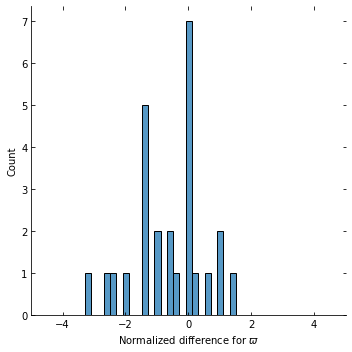

In [14]:
plt.clf()
sns.displot(
    X_plx,
    binwidth=0.2, height=5, facet_kws=dict(margin_titles=True),
)
plt.xlim([-5, 5])
plt.xlabel("Normalized difference for $\\varpi$")
plt.tight_layout()

In [15]:
print("N      PLX")
print("sigma  %")
for i in range(1, 11):
    per_plx = count_sigma(X_plx, i)

    print("{:2d}     {:2.0f} ".format(i, per_plx))

N      PLX
sigma  %
 1     54 
 2     85 
 3     96 
 4     100 
 5     100 
 6     100 
 7     100 
 8     100 
 9     100 
10     100 


In [16]:
print("X_plx >= 3")

mask = np.fabs(X_plx) >= 3
vlbi_timing_pm[mask]["psr_name", "eph", "plx_t", "plx_err_t", "plx_v",
                     "plx_err_v", "ref"]

X_plx >= 3


psr_name,eph,plx_t,plx_err_t,plx_v,plx_err_v,ref
,,mas,mas,mas,mas,
str11,bytes5,float64,float64,float64,float64,bytes6
J1022+1001,DE421,0.72,0.2,1.39,0.04,dcl+16


## 2.2 VLBI (y) vs. Timing (x)

In [17]:
results = fit_plx_offset(vlbi_timing_pm["plx_t"], vlbi_timing_pm["plx_v"],
                         dplx_err)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.807
Model:                            WLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     100.6
Date:                Sat, 20 Aug 2022   Prob (F-statistic):           4.62e-10
Time:                        16:28:06   Log-Likelihood:               0.056312
No. Observations:                  26   AIC:                             3.887
Df Residuals:                      24   BIC:                             6.404
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5687      0.088      6.467      0.000       0.387       0.750
x1             0.6621      0.066     10.032      0.000       0.526       0.798
==============================================================================
Omnibus:                        1.368   Durbin-Watson:                   2.343
Prob(Omnibus):                  0.505   Jarque-Bera (JB):                0.875
Skew:                           0.448   Prob(JB):                        0.646
Kurtosis:                       2.922   Cond. No.                         6.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
mask = np.fabs(X_plx) < 3

results = fit_plx_offset(vlbi_timing_pm[mask]["plx_t"], vlbi_timing_pm[mask]["plx_v"],
                         dplx_err[mask])
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.849
Model:                            WLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     128.9
Date:                Sat, 20 Aug 2022   Prob (F-statistic):           6.64e-11
Time:                        16:28:06   Log-Likelihood:                 2.1072
No. Observations:                  25   AIC:                           -0.2143
Df Residuals:                      23   BIC:                             2.223
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5122      0.083      6.184      0.000       0.341       0.684
x1             0.6967      0.061     11.351      0.000       0.570       0.824
==============================================================================
Omnibus:                        0.495   Durbin-Watson:                   2.591
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.528
Skew:                           0.290   Prob(JB):                        0.768
Kurtosis:                       2.588   Cond. No.                         6.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

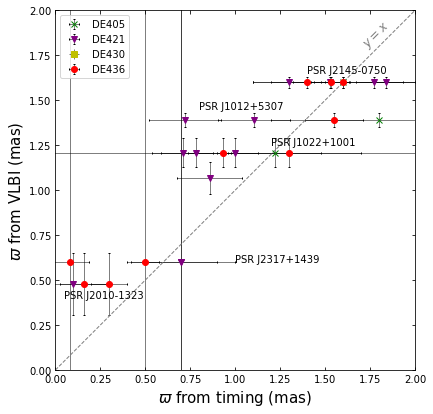

In [19]:
fig, ax = plt.subplots(figsize=(6, 6))

# ax.errorbar(pm_tab200["plx_t"],
#             pm_tab200["plx_v"],
#             xerr=pm_tab200["plx_err_v"],
#             yerr=pm_tab200["plx_err_v"],
#             fmt="b^",
#             ecolor="k",
#             elinewidth=1,
#             label="DE200")

ax.errorbar(pm_tab405["plx_t"],
            pm_tab405["plx_v"],
            xerr=pm_tab405["plx_err_t"],
            yerr=pm_tab405["plx_err_v"],
            fmt="gx",
            ecolor="k",
            elinewidth=0.5,
            capsize=1,
            label="DE405")

ax.errorbar(pm_tab421["plx_t"],
            pm_tab421["plx_v"],
            xerr=pm_tab421["plx_err_t"],
            yerr=pm_tab421["plx_err_v"],
            fmt="v",
            color="purple",
            ecolor="k",
            elinewidth=0.5,
            capsize=1,
            label="DE421")

ax.errorbar(pm_tab430["plx_t"],
            pm_tab430["plx_v"],
            xerr=pm_tab430["plx_err_t"],
            yerr=pm_tab430["plx_err_v"],
            fmt="ys",
            ecolor="k",
            elinewidth=0.5,
            capsize=1,
            label="DE430")

ax.errorbar(pm_tab436["plx_t"],
            pm_tab436["plx_v"],
            xerr=pm_tab436["plx_err_t"],
            yerr=pm_tab436["plx_err_v"],
            fmt="ro",
            ecolor="k",
            elinewidth=0.5,
            capsize=1,
            label="DE436")

x = np.arange(-1, 4, 0.1)
ax.plot(x, x, "--", color="tab:grey", lw=1)
ax.text(1.7, 1.8, "$y=x$", rotation=45, color="tab:grey", fontsize=12)

ax.text(1.2, 1.25, "PSR J1022+1001", color="k")
ax.text(0.05, 0.4, "PSR J2010-1323", color="k")
ax.text(0.8, 1.45, "PSR J1012+5307", color="k")
ax.text(1.4, 1.65, "PSR J2145-0750", color="k")
ax.text(1., 0.6, "PSR J2317+1439", color="k")


# ax.plot(x, 0.7 * x + 0.5, "-.", lw=1, color="tab:grey")
# ax.text(0.5, .95, "$y=0.70x+0.50$", rotation=35, color="tab:grey", fontsize=12)

ax.axis("square")
ax.axis([0., 2.0, 0., 2.0])

ax.set_xlabel("$\\varpi$ from timing (mas)", fontsize=15)
ax.set_ylabel("$\\varpi$ from VLBI (mas)", fontsize=15)


# plt.grid(lw=1)
plt.tight_layout()
plt.legend()

# plt.savefig("../plots/vlbi_plx-com.eps")

## 2.2 VLBI (x) vs. Timing (y)

In [20]:
results = fit_plx_offset(vlbi_timing_pm["plx_v"], vlbi_timing_pm["plx_t"],
                         dplx_err)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.807
Model:                            WLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     100.6
Date:                Sat, 20 Aug 2022   Prob (F-statistic):           4.62e-10
Time:                        16:28:06   Log-Likelihood:                -7.8826
No. Observations:                  26   AIC:                             19.77
Df Residuals:                      24   BIC:                             22.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4521      0.175     -2.586      0.016      -0.813      -0.091
x1             1.2195      0.122     10.032      0.000       0.969       1.470
==============================================================================
Omnibus:                        1.922   Durbin-Watson:                   2.745
Prob(Omnibus):                  0.383   Jarque-Bera (JB):                0.809
Skew:                          -0.371   Prob(JB):                        0.667
Kurtosis:                       3.441   Cond. No.                         9.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
mask = np.fabs(X_plx) < 3

results = fit_plx_offset(vlbi_timing_pm[mask]["plx_v"], vlbi_timing_pm[mask]["plx_t"],
                         dplx_err[mask])
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.849
Model:                            WLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     128.9
Date:                Sat, 20 Aug 2022   Prob (F-statistic):           6.64e-11
Time:                        16:28:06   Log-Likelihood:                -4.8741
No. Observations:                  25   AIC:                             13.75
Df Residuals:                      23   BIC:                             16.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4309      0.154     -2.790      0.010      -0.750      -0.111
x1             1.2179      0.107     11.351      0.000       0.996       1.440
==============================================================================
Omnibus:                        0.159   Durbin-Watson:                   2.918
Prob(Omnibus):                  0.924   Jarque-Bera (JB):                0.014
Skew:                           0.006   Prob(JB):                        0.993
Kurtosis:                       2.884   Cond. No.                         8.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


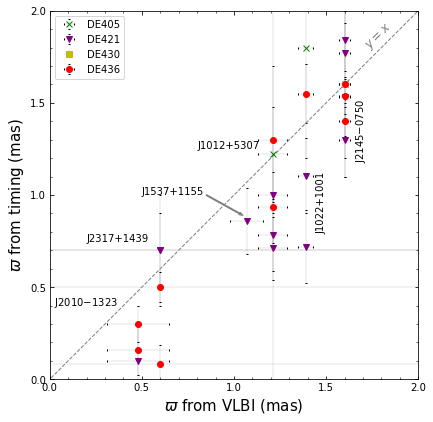

In [22]:
fig, ax = plt.subplots(figsize=(6, 6))

# ax.errorbar(pm_tab200["plx_v"], pm_tab200["plx_t"],
#             yerr=pm_tab200["plx_err_v"],
#             xerr=pm_tab200["plx_err_v"],
#             fmt="b^",
#             ecolor="k",
#             elinewidth=1,
#             label="DE200")

ax.errorbar(pm_tab405["plx_v"], pm_tab405["plx_t"],
            yerr=pm_tab405["plx_err_t"],
            xerr=pm_tab405["plx_err_v"],
            fmt="gx",
            ecolor="k",
            elinewidth=0.1,
            capsize=1,
            label="DE405")

ax.errorbar(pm_tab421["plx_v"], pm_tab421["plx_t"],
            yerr=pm_tab421["plx_err_t"],
            xerr=pm_tab421["plx_err_v"],
            fmt="v",
            color="purple",
            ecolor="k",
            elinewidth=0.1,
            capsize=1,
            label="DE421")

ax.errorbar(pm_tab430["plx_v"], pm_tab430["plx_t"],
            yerr=pm_tab430["plx_err_t"],
            xerr=pm_tab430["plx_err_v"],
            fmt="ys",
            ecolor="k",
            elinewidth=0.1,
            capsize=1,
            label="DE430")

ax.errorbar(pm_tab436["plx_v"], pm_tab436["plx_t"],
            yerr=pm_tab436["plx_err_t"],
            xerr=pm_tab436["plx_err_v"],
            fmt="ro",
            ecolor="k",
            elinewidth=0.1,
            capsize=1,
            label="DE436")

x = np.arange(-1, 4, 0.1)
ax.plot(x, x, "--", color="tab:grey", lw=1)
ax.text(1.7, 1.8, "$y=x$", rotation=45, color="tab:grey", fontsize=12)

ax.text(.8, 1.25, "J1012+5307", color="k")
ax.text(1.45, 0.8, "J1022+1001", color="k", rotation=90)
ax.text(0.025, 0.4, "J2010$-$1323", color="k")

ax.text(1.65, 1.2, "J2145$-$0750", color="k", rotation=90)
ax.text(0.2, 0.75, "J2317+1439", color="k")

ax.text(.5, 1., "J1537+1155", color="k")
ax.arrow(.85, 1.0, 0.18, -0.1, width=0.005, color="tab:grey")

# ax.plot(x, 0.7 * x + 0.5, "-.", lw=1, color="tab:grey")
# ax.text(0.5, .95, "$y=0.70x+0.50$", rotation=35, color="tab:grey", fontsize=12)

ax.axis("square")
ax.axis([-0., 2.0, -0., 2.0])
ax.set_xticks(np.arange(0, 2.1, 0.5))
ax.set_yticks(np.arange(0, 2.1, 0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

ax.set_xlabel("$\\varpi$ from VLBI (mas)", fontsize=15)
ax.set_ylabel("$\\varpi$ from timing (mas)", fontsize=15)


# plt.grid(lw=1)
plt.tight_layout()
plt.legend()

plt.savefig("../plots/vlbi_plx-com.eps")

In [23]:
vlbi_timing_pm[vlbi_timing_pm["psr_name"] == "J1537+1155"]

psr_bname,psr_name,pos_epoch_t,eph,ra_t,dec_t,pmra_t,pmdec_t,plx_t,ra_err_t,dec_err_t,pmra_err_t,pmdec_err_t,plx_err_t,ref,comment,pos_epoch_v,ra_v,dec_v,pmra_v,pmdec_v,plx_v,ra_err_v,dec_err_v,pmra_err_v,pmdec_err_v,plx_err_v
,,d,,,,,,mas,,,,,mas,,,,,,,,mas,,,,,mas
bytes10,str11,float64,bytes5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes6,bytes13,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
B1534+12,J1537+1155,52077.0,DE421,234.29150720833331,11.93206496388889,1.482,-25.285,0.86,0.04402770443689709,0.06,0.007,0.012,0.18,fst14,,57964.0,234.29151444583334,11.931952055555556,1.51,-25.31,1.07,0.802,0.825,0.02,0.05,0.09
